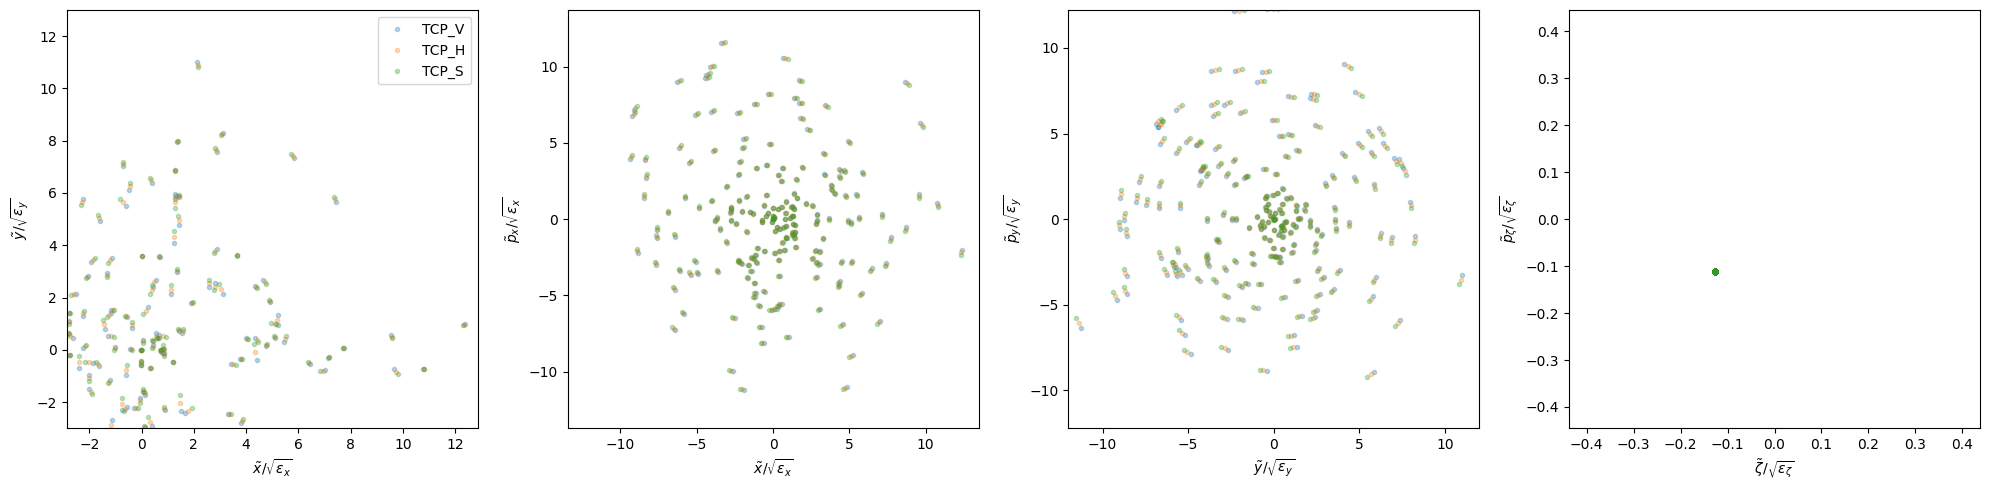

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sciStat
import nafflib
import time
import matplotlib.gridspec as gridspec

# BBStudies
import BBStudies.Tracking.XsuitePlus as xPlus
import BBStudies.Tracking.Utils as xutils
import BBStudies.Physics.Constants as cst
import BBStudies.Physics.Base as phys
import BBStudies.Plotting.BBPlots as bbplt



def phase_space_labels(fig,axes):

    # Adding labels

    for plane,ax in zip(['xy','x','y','zeta'],axes):
        plt.sca(ax)
        plt.axis('equal')
        if plane == 'zeta':
            plane = '\zeta'
        plt.xlabel(rf'$\tilde {plane}/\sqrt{{\varepsilon_{plane}}}$')
        plt.ylabel(rf'$\tilde p_{plane}/\sqrt{{\varepsilon_{plane}}}$')
        
        if plane == 'xy':
            plt.xlabel(rf'$\tilde x/\sqrt{{\varepsilon_x}}$')
            plt.ylabel(rf'$\tilde y/\sqrt{{\varepsilon_y}}$')
        if plane == '\zeta':
            plt.xlim(-0.5,0.5)
            plt.ylim(-0.5,0.5)
        elif plane == 'xy':
            plt.xlim(-2,12)
            plt.ylim(-2,12)
        else:
            plt.xlim(-12,12)
            plt.ylim(-12,12)





interface = xPlus.Tracking_Interface.from_parquet(  path                = 'tracking',
                                                    collider_name       = 'BUNCH_0220',
                                                    distribution_name   =  'XY_ZETA_1',
                                                    poincare_names      = None,
                                                    datakeys            = None)


fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for psection in interface.poincare:
    coord = psection.data['checkpoints'].df_sig
    coord = coord[coord['turn'] == 900]

    
    plt.sca(axes[0])
    plt.plot(coord.x_sig,coord.y_sig, '.', alpha=0.3,label=psection.name)

    for plane,ax in zip(['x','y','zeta'],axes[1:]):
        plt.sca(ax)
        plt.plot(coord[f'{plane}_sig'],coord[f'p{plane}_sig'], '.', alpha=0.3)

phase_space_labels(fig,axes)
plt.sca(axes[0])
plt.legend()
plt.tight_layout()





In [2]:
interface

╭────────────────────────────── Tracking_Interface ───────────────────────────────╮
│ ╭─────────────────────────────────────────────────────────────────────────────╮ │
│ │ <BBStudies.Tracking.XsuitePlus.RenderingInterface object at 0x29d71ed10>    │ │
│ ╰─────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                 │
│   context_name = 'ContextCpu'                                                   │
│       cycle_at = 'IP3'                                                          │
│      exec_time = 44.4181359159993                                               │
│         method = '6D'                                                           │
│       nemitt_x = 1.8e-06                                                        │
│       nemitt_y = 1.8e-06                                                        │
│    nemitt_zeta = 2.518974830720048                                              │
│  num_particles = 225                                                            │
│      num_turns = 1000                                                           │
│ particle_on_co = "<class 'xtrack.particles.particles.Particles'>"               │
│       poincare = {                                                              │
│                      'TCP_V': ['naff', 'excursion', 'checkpoints', 'tbt'],      │
│                      'TCP_H': ['naff', 'excursion', 'checkpoints', 'tbt'],      │
│                      'TCP_S': ['naff', 'excursion', 'checkpoints', 'tbt']       │
│                  }                                                              │
│       sequence = None                                                           │
│        sigma_z = 0.09                                                           │
│     tune_on_co = [62.300420699147864, 60.31024480503938, -0.001867004884215484] │
╰─────────────────────────────────────────────────────────────────────────────────╯

In [3]:
interface.poincare

╭─────────────────────────────── Poincare_Section ────────────────────────────────╮
│ ╭─────────────────────────────────────────────────────────────────────────────╮ │
│ │ <BBStudies.Tracking.XsuitePlus.RenderingPoincare object at 0x29d71e560>     │ │
│ ╰─────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                 │
│       datakeys = ['naff', 'excursion', 'checkpoints', 'tbt']                    │
│        ee_name = 'tcp.d6l7.b1'                                                  │
│           name = 'TCP_V'                                                        │
│       nemitt_x = 1.8e-06                                                        │
│       nemitt_y = 1.8e-06                                                        │
│    nemitt_zeta = 2.518974830720048                                              │
│ particle_on_co = "<class 'xtrack.particles.particles.Particles'>"               │
│              s = 13124.463600000003                                             │
│     tune_on_co = [62.300420699147864, 60.31024480503938, -0.001867004884215484] │
╰─────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────── Poincare_Section ────────────────────────────────╮
│ ╭─────────────────────────────────────────────────────────────────────────────╮ │
│ │ <BBStudies.Tracking.XsuitePlus.RenderingPoincare object at 0x29d71e860>     │ │
│ ╰─────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                 │
│       datakeys = ['naff', 'excursion', 'checkpoints', 'tbt']                    │
│        ee_name = 'tcp.c6l7.b1'                                                  │
│           name = 'TCP_H'                                                        │
│       nemitt_x = 1.8e-06                                                        │
│       nemitt_y = 1.8e-06                                                        │
│    nemitt_zeta = 2.518974830720048                                              │
│ particle_on_co = "<class 'xtrack.particles.particles.Particles'>"               │
│              s = 13126.463600000003                                             │
│     tune_on_co = [62.300420699147864, 60.31024480503938, -0.001867004884215484] │
╰─────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────── Poincare_Section ────────────────────────────────╮
│ ╭─────────────────────────────────────────────────────────────────────────────╮ │
│ │ <BBStudies.Tracking.XsuitePlus.RenderingPoincare object at 0x29d6e7430>     │ │
│ ╰─────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                 │
│       datakeys = ['naff', 'excursion', 'checkpoints', 'tbt']                    │
│        ee_name = 'tcp.b6l7.b1'                                                  │
│           name = 'TCP_S'                                                        │
│       nemitt_x = 1.8e-06                                                        │
│       nemitt_y = 1.8e-06                                                        │
│    nemitt_zeta = 2.518974830720048                                              │
│ particle_on_co = "<class 'xtrack.particles.particles.Particles'>"               │
│              s = 13128.463600000003                                             │
│     tune_on_co = [62.300420699147864, 60.31024480503938, -0.001867004884215484] │
╰─────────────────────────────────────────────────────────────────────────────────╯

[, , ]

In [5]:
interface.prettyconfig

╭─────────────────────────────────────────────────── Config ───────────────────────────────────────────────────╮
│ ╭──────────────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ {                                                                                                        │ │
│ │ │   'tracking': {                                                                                        │ │
│ │ │   │   'context': {'type': 'CPU', 'device_id': None},                                                   │ │
│ │ │   │   'collider': {                                                                                    │ │
│ │ │   │   │   'path': 'colliders/collider_BUNCH_0220.json',                                                │ │
│ │ │   │   │   'name': 'BUNCH_0220',                                                                        │ │
│ │ │   │   │   'sequence': 'lhcb1',                                                                         │ │
│ │ │   │   │   'method': '6D',                                                                              │ │
│ │ │   │   │   'cycle_at': 'IP3',                                                                           │ │
│ │ │   │   │   'monitor_at': ['TCP_V', 'TCP_H', 'TCP_S']                                                    │ │
│ │ │   │   },                                                                                               │ │
│ │ │   │   'particles': {'path': 'particles/XY_ZETA_1.parquet', 'name': 'XY_ZETA_1'},                       │ │
│ │ │   │   'num_turns': 1000,                                                                               │ │
│ │ │   │   'size_chunks': 100,                                                                              │ │
│ │ │   │   'num_chunks': None                                                                               │ │
│ │ │   },                                                                                                   │ │
│ │ │   'analysis': {                                                                                        │ │
│ │ │   │   'path': 'tracking/',                                                                             │ │
│ │ │   │   'turn_by_turn': {'active': True},                                                                │ │
│ │ │   │   'checkpoints': {'active': True},                                                                 │ │
│ │ │   │   'excursion': {'active': True},                                                                   │ │
│ │ │   │   'naff': {                                                                                        │ │
│ │ │   │   │   'active': True,                                                                              │ │
│ │ │   │   │   'num_turns': 500,                                                                            │ │
│ │ │   │   │   'num_harmonics': 10,                                                                         │ │
│ │ │   │   │   'window_order': 4,                                                                           │ │
│ │ │   │   │   'window_type': 'hann',                                                                       │ │
│ │ │   │   │   'multiprocesses': 4                                                                          │ │
│ │ │   │   }                                                                                                │ │
│ │ │   },                                                                                                   │ │
│ │ │   'elements': {                                                                                        │ │
│ │ │   │   'lhcb1': {                                                                                       │ │
│ │ │   │   │   'IP3': 'ip3',                                                                                │ │
│ │ │   │   │   'TCP_V': 'tcp.d6l7.b1',      

''